In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

In [2]:
lending_data = pd.read_csv('lending_train.csv')

print(lending_data.shape)
lending_data.head()

(443587, 128)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,13000.0,13000.0,13000.0,36 months,6.99%,401.35,Mold Maker,10+ years,MORTGAGE,120000.0,Source Verified,Mar-2017,n,NaN,NaN,debt_consolidation,Debt consolidation,600xx,IL,8.30,0.0,Dec-1997,0.0,42.0,NaN,11.0,0.0,15591.0,52.5%,21.0,f,0.0,69.0,Individual,NaN,NaN,NaN,0.0,0.0,67371.0,1.0,1.0,0.0,0.0,28.0,2574.0,22.0,1.0,3.0,6942.0,44.0,29700.0,0.0,0.0,0.0,3.0,6737.0,3657.0,73.7,0.0,0.0,168.0,231.0,6.0,6.0,3.0,16.0,42.0,13.0,42.0,2.0,3.0,7.0,3.0,4.0,3.0,9.0,15.0,7.0,11.0,0.0,0.0,0.0,1.0,76.2,33.3,0.0,0.0,239301.0,18165.0,13900.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,9000.0,9000.0,9000.0,36 months,10.49%,292.48,Director of Sales,3 years,RENT,172000.0,Not Verified,Mar-2017,n,NaN,NaN,debt_consolidation,Debt consolidation,101xx,NY,21.71,0.0,Sep-1994,1.0,73.0,NaN,15.0,0.0,16560.0,64.2%,30.0,w,0.0,NaN,Individual,NaN,NaN,NaN,0.0,0.0,94190.0,1.0,4.0,0.0,3.0,18.0,37956.0,59.0,1.0,1.0,5940.0,61.0,25800.0,0.0,0.0,1.0,4.0,6728.0,5109.0,73.3,0.0,0.0,270.0,173.0,4.0,4.0,0.0,76.0,NaN,4.0,NaN,0.0,4.0,7.0,5.0,6.0,16.0,10.0,13.0,7.0,15.0,0.0,0.0,0.0,1.0,96.7,80.0,0.0,0.0,129752.0,94190.0,19100.0,64278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12000.0,12000.0,12000.0,36 months,7.99%,375.99,registerd nurse,9 years,MORTGAGE,100000.0,Verified,Mar-2017,n,NaN,NaN,debt_consolidation,Debt consolidation,917xx,CA,28.82,0.0,Apr-2003,1.0,NaN,NaN,14.0,0.0,25423.0,52.1%,65.0,w,0.0,NaN,Individual,NaN,NaN,NaN,0.0,9550.0,555654.0,2.0,5.0,4.0,5.0,6.0,129297.0,77.0,6.0,8.0,5827.0,65.0,48800.0,5.0,0.0,5.0,15.0,42743.0,22577.0,53.0,0.0,0.0,113.0,167.0,8.0,6.0,6.0,8.0,NaN,6.0,NaN,0.0,6.0,6.0,7.0,24.0,15.0,8.0,43.0,6.0,14.0,0.0,0.0,0.0,11.0,100.0,33.3,0.0,0.0,601250.0,154720.0,48000.0,148041.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Clean Features

In [3]:
# look for features that have % signs in their strings
percentage_feats = [feat for feat in lending_data.select_dtypes(include=['O'])
                    if lending_data[feat].str.contains('%').any()]

percentage_feats

['int_rate', 'emp_title', 'revol_util']

In [4]:
# remove percentage signs, convert to float dtypes
def remove_percentage_sign(df, feat):
    df = df.copy()
    df[feat] = df[feat].str.replace(r'%', '').astype('float')
    return df

for feat in ['int_rate', 'revol_util']:
    lending_data = remove_percentage_sign(lending_data, feat)

## Split Data

In [5]:
lending_train, lending_val, rate_train, rate_val = train_test_split(
    lending_data, lending_data['int_rate'], test_size=0.1, random_state=12)

## Missing Values

In [6]:
def feats_with_na_above_thresh(df, min_thresh, max_thresh=1.0):
    missing_feats = [feat for feat in df.columns if 
                     (df[feat].isnull().sum() / df.shape[0]) > min_thresh and
                     df[feat].isnull().sum() / df.shape[0] <= max_thresh]
    return df[missing_feats].isnull().mean().sort_values(ascending=False)
    
feats_with_na_above_thresh(lending_train, min_thresh=0.05)

member_id                                     1.000000
url                                           1.000000
desc                                          1.000000
id                                            0.999985
orig_projected_additional_accrued_interest    0.996335
payment_plan_start_date                       0.995599
hardship_status                               0.995599
deferral_term                                 0.995599
hardship_amount                               0.995599
hardship_start_date                           0.995599
hardship_end_date                             0.995599
hardship_loan_status                          0.995599
hardship_length                               0.995599
hardship_dpd                                  0.995599
hardship_type                                 0.995599
hardship_payoff_balance_amount                0.995599
hardship_last_payment_amount                  0.995599
hardship_reason                               0.995599
settlement

### Relationship between missing & interest rate

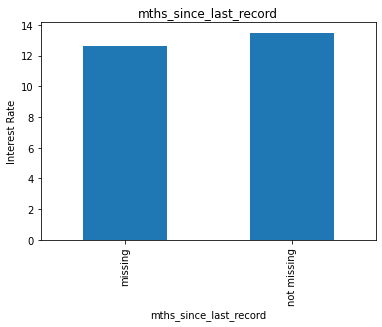

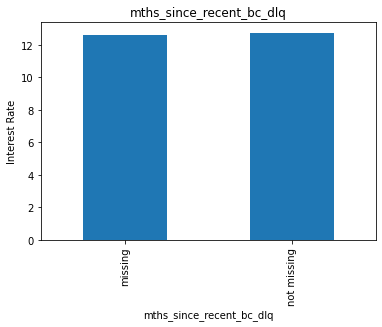

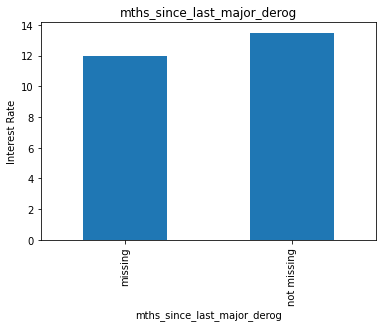

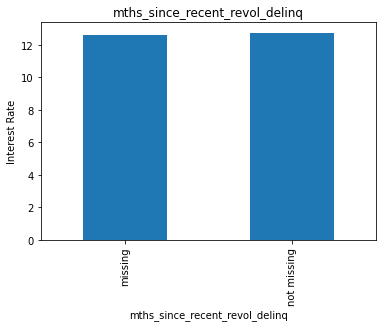

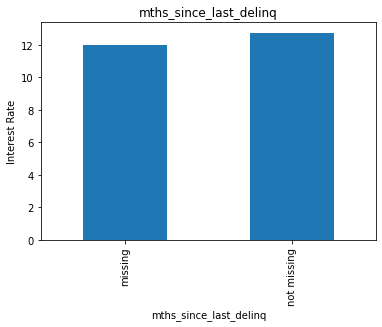

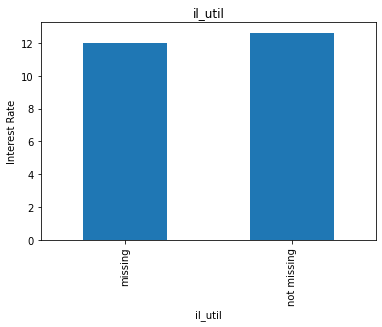

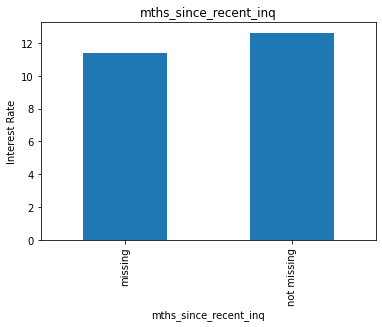

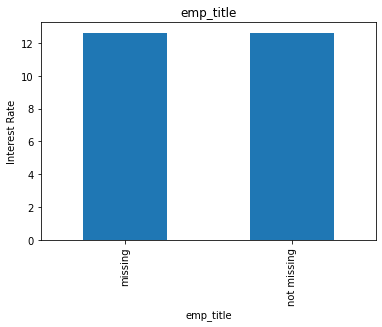

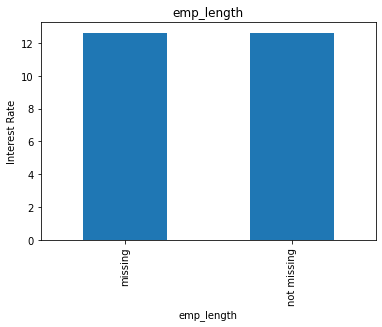

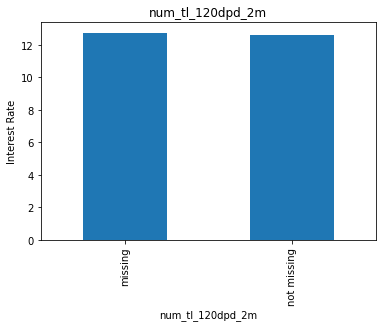

In [7]:
def compare_na_value(df, feat):
    df = df.copy()
    df[feat] = np.where(df[feat].isnull(), 'missing', 'not missing')
    df.groupby(feat)['int_rate'].median().plot.bar()
    plt.ylabel('Interest Rate')
    plt.title(feat)
    plt.show()

# run function on features w/ < 90% missing & > 5% missing
na_feats_lt_90_and_grt_5 = feats_with_na_above_thresh(lending_train, 0.05, 0.9).index
for feat in na_feats_lt_90_and_grt_5:
    compare_na_value(lending_train, feat)

## Numerical Variables

In [8]:
num_feats = [feat for feat in lending_train.columns if 
    lending_train[feat].dtypes != 'O']

print(f'Number of numerical variables: {len(num_feats)}')
lending_train[num_feats].head()

Number of numerical variables: 98


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,desc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
326002,NaN,15000.0,15000.0,14975.0,10.91,490.45,95000.0,NaN,NaN,5.70,1.0,2.0,3.0,91.0,12.0,1.0,5510.0,20.4,20.0,0.0,NaN,NaN,NaN,0.0,0.0,181778.0,1.0,1.0,0.0,0.0,31.0,15878.0,87.0,1.0,5.0,2119.0,47.0,27000.0,3.0,2.0,3.0,7.0,15148.0,20524.0,14.8,0.0,0.0,147.0,120.0,1.0,1.0,2.0,1.0,3.0,5.0,3.0,0.0,4.0,6.0,8.0,8.0,5.0,10.0,13.0,6.0,12.0,0.0,0.0,0.0,1.0,95.0,12.5,1.0,0.0,209256.0,21388.0,24100.0,18281.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386368,NaN,1000.0,1000.0,1000.0,15.05,34.69,78000.0,NaN,NaN,10.51,0.0,2.0,NaN,NaN,16.0,0.0,25277.0,45.1,25.0,0.0,NaN,NaN,NaN,0.0,0.0,240899.0,1.0,1.0,1.0,1.0,5.0,2720.0,91.0,0.0,2.0,6654.0,48.0,56000.0,2.0,0.0,3.0,3.0,17207.0,24623.0,50.7,0.0,0.0,56.0,212.0,20.0,5.0,2.0,20.0,NaN,5.0,NaN,0.0,6.0,6.0,10.0,13.0,3.0,14.0,20.0,6.0,16.0,0.0,0.0,0.0,1.0,100.0,60.0,0.0,0.0,283000.0,27997.0,49900.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164450,NaN,12000.0,12000.0,12000.0,15.05,285.80,103600.0,NaN,NaN,27.49,1.0,2.0,15.0,NaN,19.0,0.0,17322.0,35.4,31.0,0.0,NaN,NaN,NaN,0.0,1878.0,213471.0,3.0,4.0,2.0,6.0,3.0,51002.0,72.0,1.0,4.0,6414.0,57.0,49000.0,2.0,2.0,3.0,10.0,11860.0,17666.0,45.0,0.0,0.0,166.0,86.0,5.0,3.0,2.0,19.0,NaN,1.0,15.0,0.0,5.0,9.0,6.0,6.0,15.0,14.0,14.0,9.0,19.0,0.0,0.0,0.0,3.0,96.7,16.7,0.0,0.0,280465.0,68324.0,32100.0,70647.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207722,NaN,5000.0,5000.0,5000.0,12.62,167.56,43000.0,NaN,NaN,10.66,0.0,0.0,NaN,88.0,7.0,1.0,2644.0,57.5,15.0,0.0,NaN,NaN,NaN,0.0,492.0,5304.0,1.0,1.0,0.0,1.0,18.0,2660.0,57.0,1.0,3.0,2048.0,57.0,4600.0,0.0,0.0,0.0,4.0,884.0,186.0,92.8,0.0,0.0,141.0,212.0,5.0,5.0,0.0,24.0,NaN,23.0,NaN,0.0,2.0,3.0,2.0,4.0,5.0,6.0,10.0,3.0,7.0,0.0,0.0,0.0,1.0,100.0,50.0,1.0,0.0,9275.0,5304.0,2600.0,4675.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87756,NaN,8000.0,8000.0,8000.0,10.49,259.99,62000.0,NaN,NaN,9.19,0.0,1.0,41.0,NaN,11.0,0.0,3560.0,31.0,13.0,0.0,41.0,NaN,NaN,0.0,0.0,40704.0,2.0,8.0,2.0,2.0,5.0,37144.0,96.0,1.0,2.0,1848.0,81.0,11500.0,4.0,1.0,4.0,4.0,3700.0,7940.0,31.0,0.0,0.0,81.0,167.0,5.0,5.0,1.0,5.0,NaN,5.0,41.0,2.0,3.0,3.0,3.0,3.0,8.0,3.0,4.0,3.0,11.0,0.0,0.0,0.0,3.0,84.6,33.3,0.0,0.0,50272.0,40704.0,11500.0,38772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Discrete Variables

In [10]:
discrete_feats = [feat for feat in num_feats if len(
    lending_train[feat].unique()) < 20 and feat not in ['member_id', 'url', 'desc']]

print(f'Number of discrete variables: {len(discrete_feats)}')
lending_train[discrete_feats].head()

Number of discrete variables: 15


,inq_last_6mths,collections_12_mths_ex_med,acc_now_delinq,open_acc_6m,open_il_12m,chargeoff_within_12_mths,num_tl_120dpd_2m,num_tl_30dpd,pub_rec_bankruptcies,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_length
326002,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
386368,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
164450,2.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
207722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
87756,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


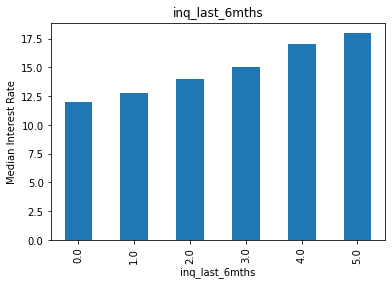

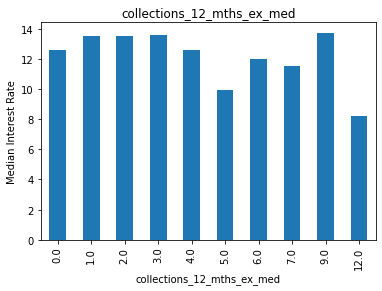

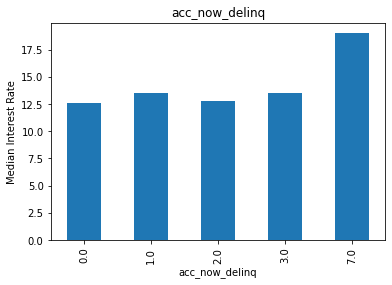

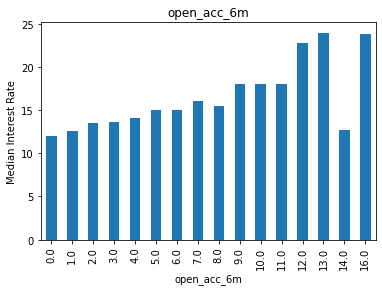

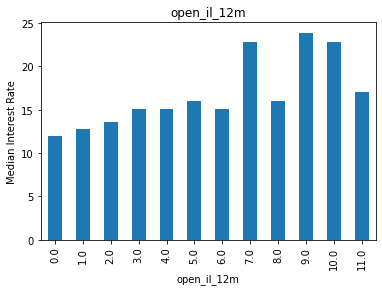

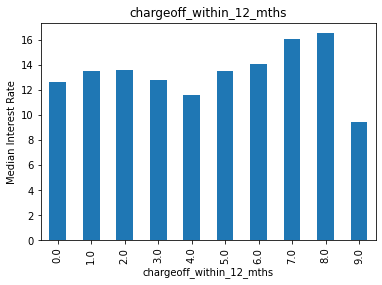

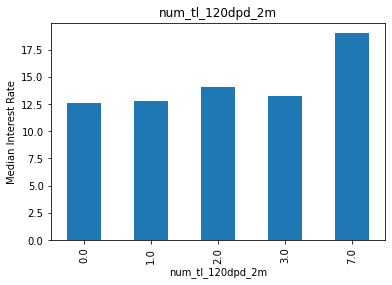

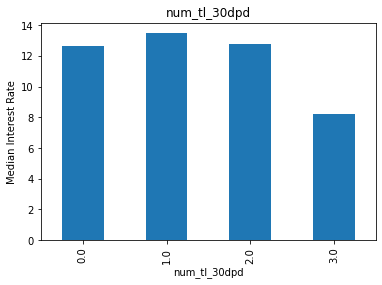

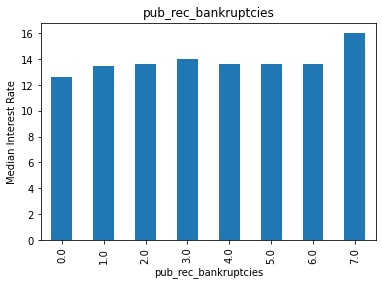

In [12]:
def rate_to_discrete(df, feat):
    df = df.copy()
    df.groupby(feat)['int_rate'].median().plot.bar()
    plt.title(feat)
    plt.ylabel('Median Interest Rate')
    plt.show()
    
for feat in discrete_feats:
    if feat not in ['sec_app_inq_last_6mths', 
                    'sec_app_mort_acc', 
                    'sec_app_chargeoff_within_12_mths', 
                    'sec_app_collections_12_mths_ex_med',
                    'deferral_term',
                    'hardship_length']:
        rate_to_discrete(lending_train, feat)

There tends to be a relationship between the variables and interest rates, but this relationship is not always monotonic.

## Continuous Variables